# Analysis of Fortune's Top Companies of 2021

### Dataset - Fortune 1000

Every year Fortune, an American Business Magazine, publishes the Fortune 500, which ranks the top 500 corporations by revenue. 
However, the dataset used for this study includes all 1000 companies, as opposed to just the top 500.

The Fortune 1000 dataset used for this study has been taken from [here](https://www.kaggle.com/datasets/winston56/fortune-500-data-2021), and contains U.S. company data for the year 2021, with market valuations determined on January 20,2021.
The dataset has 1000 rows and 18 columns/attributes, namely:

|Attribute|Description|Note|Data Type|
|---------|-----------|----|-----|
|Company            | The name of the company| |object|
|Rank               | The ranking given to the company by Fortune in 2021| Values range from 1 (most revenue) to 1000 (least revenue)|object|
|Rank Change        | The change in the company's ranking from 2020 to 2021| Company can only have a change in rank if it is currently in the top 500 and was in the top 500 the year before|int64|
|Revenue            | Dollar value for revenue of the company in millions| Companies are ranked through this attribute|float64|
|Profit             | Dollar value for profit of the company in millions| |float64|
|Number of Employees| Number of people the company has employed| |int64|
|Sector             | The sector of the market the company operates in| |object|
|City               | The city where the company has its headquarters | All the companies are in the United Stated |object|
|State              | The state where the company has its headquarters | All the companies are in the United Stated |object|
|Newcomer           | Indicates whether the company is new to the top Fortune 500|  No value assigned to companies outside of the top 500|object (yes/no)|
|CEO Founder        | Indicates whether the current CEO of the company is also its founder| |object (yes/no)|
|CEO Woman          | Indicates whether the CEO of the company is a woman | | object (yes/no)|
|Profitable         | Indicates whether the company has profited over the last year or not| |object (yes/no)|
|Previous Rank      | The ranking given to the company by Fortune in 2020| No value assigned to companies outside of the top 500|float64|
|CEO                | The name of the CEO of the company| |object|
|Website            | The url to the company's website| |object|
|Ticker             | The stock ticker symbol of the company| Values assigned only for public companies, value is null if the company is privately-owned|object|
|Market Cap         | The total dollar market value of the company's outstanding shares of stock in millions| Values null in the case of some private companies|float64|


In addition to this, key factors regarding the spread and centrality shall be discussed, followed by a systematic approach to clean the dataset by resolving inconsistencies, removing missing values and replacing outliers.




# Part 1 – Preparing for Data Scaling
- Importing Modules
- Importing Dataset
- Cleaning 
- Encoding

### Importing Required Libraries
- When using Jupyter Notebook with a dark editor the axes, tick, text etc. are difficult with a black theme to see since they are black by default so I will change them to gray
- Adjust font size
- Import Pandas, Numpy and Matplotlib

In [57]:
import matplotlib as mpl

font = {'family' : 'Georgia',
        'weight' : 'bold',
        'size'   : 16}

COLOR = 'gray'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

mpl.rc('font', **font)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

### Retrieving the dataset and sorting by rank

In [58]:
df = pd.read_csv("Fortune_1000.csv", index_col=['rank']).sort_index()
df.head(10)

,company,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
rank,,,,,,,,,,,,,,,,,
1,Walmart,0,523964.00,14881.00,2200000,Retailing,Bentonville,AR,no,no,no,yes,1,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
2,Amazon,3,280522.00,11588.00,798000,Retailing,Seattle,WA,no,yes,no,yes,5,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
3,Exxon Mobil,-1,264938.00,14340.00,74900,Energy,Irving,TX,no,no,no,yes,2,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
4,Apple,-1,260174.00,55256.00,137000,Technology,Cupertino,CA,no,no,no,yes,3,Timothy D. Cook,https://www.apple.com,AAPL,2221176
5,CVS Health,3,256776.00,6634.00,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8,Karen S. Lynch,https://www.cvshealth.com,CVS,98496
6,Berkshire Hathaway,-2,254616.00,81417.00,391500,Financials,Omaha,NE,no,no,no,yes,4,Warren E. Buffett,https://www.berkshirehathaway.com,BRKA,550878
7,UnitedHealth Group,-1,242155.00,13839.00,325000,Health Care,Minnetonka,MN,no,no,no,yes,6,Andrew P. Witty,https://www.unitedhealthgroup.com,UNH,332885
8,McKesson,-1,214319.00,34.00,70000,Health Care,Irving,TX,no,no,no,yes,7,Brian S. Tyler,https://www.mckesson.com,MCK,29570
9,AT&T,0,181193.00,13903.00,247800,Telecommunications,Dallas,TX,no,no,no,yes,9,John T. Stankey,https://www.att.com,T,206369


### Removing Attributes

Moreover, some attributes are not needed for this study since they have too many values missing by virtue of their definition or are not relevant, and can be dropped including:
- website 
- prev_rank
- rank_change 
- newcomer 

In [59]:
df = df.drop(columns=['prev_rank', 'rank_change', 'newcomer', 'Website'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   revenue            1000 non-null   float64
 2   profit             998 non-null    float64
 3   num. of employees  1000 non-null   int64  
 4   sector             1000 non-null   object 
 5   city               1000 non-null   object 
 6   state              1000 non-null   object 
 7   ceo_founder        1000 non-null   object 
 8   ceo_woman          1000 non-null   object 
 9   profitable         1000 non-null   object 
 10  CEO                992 non-null    object 
 11  Ticker             938 non-null    object 
 12  Market Cap         960 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 109.4+ KB


### Coerce object types to numeric
The attribute Market Cap has object as its dtype instead of float64, due to presence of null values or spaces (instead of blank field).

In [60]:
df[['Market Cap']] = df[['Market Cap']].apply(pd.to_numeric, errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   revenue            1000 non-null   float64
 2   profit             998 non-null    float64
 3   num. of employees  1000 non-null   int64  
 4   sector             1000 non-null   object 
 5   city               1000 non-null   object 
 6   state              1000 non-null   object 
 7   ceo_founder        1000 non-null   object 
 8   ceo_woman          1000 non-null   object 
 9   profitable         1000 non-null   object 
 10  CEO                992 non-null    object 
 11  Ticker             938 non-null    object 
 12  Market Cap         950 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB


### Rearrange attributes

In [61]:
df = df[['company', 'Ticker','CEO','ceo_founder', 'ceo_woman', 'city',	'state', 'revenue', 'profit','profitable', 'num. of employees', 'sector', 'Market Cap']]
df

,company,Ticker,CEO,ceo_founder,ceo_woman,city,state,revenue,profit,profitable,num. of employees,sector,Market Cap
rank,,,,,,,,,,,,,
1,Walmart,WMT,C. Douglas McMillon,no,no,Bentonville,AR,523964.00,14881.00,yes,2200000,Retailing,411690.00
2,Amazon,AMZN,Jeffrey P. Bezos,yes,no,Seattle,WA,280522.00,11588.00,yes,798000,Retailing,1637405.00
3,Exxon Mobil,XOM,Darren W. Woods,no,no,Irving,TX,264938.00,14340.00,yes,74900,Energy,177923.00
4,Apple,AAPL,Timothy D. Cook,no,no,Cupertino,CA,260174.00,55256.00,yes,137000,Technology,2221176.00
5,CVS Health,CVS,Karen S. Lynch,no,yes,Woonsocket,RI,256776.00,6634.00,yes,290000,Health Care,98496.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Mr. Cooper Group,COOP,Jay Bray,no,no,Coppell,TX,2007.00,274.00,yes,9100,Financials,674.10
997,Herc Holdings,HRI,Lawrence H. Silber,no,no,Bonita Springs,FL,1999.00,47.50,yes,5100,Business Services,590.50
998,Healthpeak Properties,PEAK,Thomas M. Herzog,no,no,Irvine,CA,1997.40,45.50,yes,204,Financials,12059.30


In [62]:
categorical_attributes = ['sector','ceo_founder','ceo_woman','profitable', 'state']
numerical_attributes = ['revenue','profit','num. of employees','Market Cap']
target_attribute = ["Market Cap"]

### Encoding 

None of the categorical attributes have any inherent order therefore label encoder will be used 

In [63]:
from sklearn.preprocessing import LabelEncoder

def labelEncoder(df, columns, encoder):
    temp = df.copy()
    for col in columns:
        temp[col] = encoder.fit_transform(temp[col])

    return temp

df = labelEncoder(df, categorical_attributes,  LabelEncoder())
df

,company,Ticker,CEO,ceo_founder,ceo_woman,city,state,revenue,profit,profitable,num. of employees,sector,Market Cap
rank,,,,,,,,,,,,,
1,Walmart,WMT,C. Douglas McMillon,0,0,Bentonville,1,523964.00,14881.00,1,2200000,16,411690.00
2,Amazon,AMZN,Jeffrey P. Bezos,1,0,Seattle,44,280522.00,11588.00,1,798000,16,1637405.00
3,Exxon Mobil,XOM,Darren W. Woods,0,0,Irving,40,264938.00,14340.00,1,74900,4,177923.00
4,Apple,AAPL,Timothy D. Cook,0,0,Cupertino,3,260174.00,55256.00,1,137000,17,2221176.00
5,CVS Health,CVS,Karen S. Lynch,0,1,Woonsocket,37,256776.00,6634.00,1,290000,9,98496.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Mr. Cooper Group,COOP,Jay Bray,0,0,Coppell,40,2007.00,274.00,1,9100,6,674.10
997,Herc Holdings,HRI,Lawrence H. Silber,0,0,Bonita Springs,8,1999.00,47.50,1,5100,2,590.50
998,Healthpeak Properties,PEAK,Thomas M. Herzog,0,0,Irvine,3,1997.40,45.50,1,204,6,12059.30


Market Cap of the company in millions will be converted to billions to make model predictions easier,

In [64]:
million_to_billion = lambda million: million/1000.0
df['Market Cap'] = df['Market Cap'].apply(million_to_billion)
df

,company,Ticker,CEO,ceo_founder,ceo_woman,city,state,revenue,profit,profitable,num. of employees,sector,Market Cap
rank,,,,,,,,,,,,,
1,Walmart,WMT,C. Douglas McMillon,0,0,Bentonville,1,523964.00,14881.00,1,2200000,16,411.69
2,Amazon,AMZN,Jeffrey P. Bezos,1,0,Seattle,44,280522.00,11588.00,1,798000,16,1637.40
3,Exxon Mobil,XOM,Darren W. Woods,0,0,Irving,40,264938.00,14340.00,1,74900,4,177.92
4,Apple,AAPL,Timothy D. Cook,0,0,Cupertino,3,260174.00,55256.00,1,137000,17,2221.18
5,CVS Health,CVS,Karen S. Lynch,0,1,Woonsocket,37,256776.00,6634.00,1,290000,9,98.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Mr. Cooper Group,COOP,Jay Bray,0,0,Coppell,40,2007.00,274.00,1,9100,6,0.67
997,Herc Holdings,HRI,Lawrence H. Silber,0,0,Bonita Springs,8,1999.00,47.50,1,5100,2,0.59
998,Healthpeak Properties,PEAK,Thomas M. Herzog,0,0,Irvine,3,1997.40,45.50,1,204,6,12.06



Finally for this part, we will mirror what was done in Iteration 1, so as to have our current dataset synced with the changes made in the previous project iteration, namely introducing missing values to satisfy the project's original contraints of having 10-20% missing values in at least two attributes,


In [65]:
def missingData():
    """
    Description: This method will show the percentage of missing data per attribute
    Parameters: This function does not take any parameters
    Return: This function does not return anything
    """
    missing_data = 0
    total_data = df.shape[0] * df.shape[1]

    for col in df.columns:
        missing_col = 0
        missing_col = df[col].isna().sum()
        print(f"{round(missing_col/df.shape[0] * 100, 2)} % of the data from column {col.capitalize()} is missing")
        missing_data += missing_col
    
    print(f"{missing_data} of {total_data} entries are missing.")
    print(f"{round(missing_data/total_data * 100, 2)} % of the data is missing")

missingData()

0.0 % of the data from column Company is missing
6.2 % of the data from column Ticker is missing
0.8 % of the data from column Ceo is missing
0.0 % of the data from column Ceo_founder is missing
0.0 % of the data from column Ceo_woman is missing
0.0 % of the data from column City is missing
0.0 % of the data from column State is missing
0.0 % of the data from column Revenue is missing
0.2 % of the data from column Profit is missing
0.0 % of the data from column Profitable is missing
0.0 % of the data from column Num. of employees is missing
0.0 % of the data from column Sector is missing
5.0 % of the data from column Market cap is missing
122 of 13000 entries are missing.
0.94 % of the data is missing



So the dataset falls short of having 10% - 20% missing values in at least two attributes, which is as expected (from Iteration 1). Market cap and ticker are about 5% away from the minimum constraint, but these are informative categorical attributes and cannot be replaced using predictive modelling so unfortunately the corresponding rows having missing values must be dropped for these attributes,


In [66]:
df = df.dropna(subset=['Ticker', 'CEO'])
missingData()

0.0 % of the data from column Company is missing
0.0 % of the data from column Ticker is missing
0.0 % of the data from column Ceo is missing
0.0 % of the data from column Ceo_founder is missing
0.0 % of the data from column Ceo_woman is missing
0.0 % of the data from column City is missing
0.0 % of the data from column State is missing
0.0 % of the data from column Revenue is missing
0.11 % of the data from column Profit is missing
0.0 % of the data from column Profitable is missing
0.0 % of the data from column Num. of employees is missing
0.0 % of the data from column Sector is missing
0.11 % of the data from column Market cap is missing
2 of 12090 entries are missing.
0.02 % of the data is missing



Revenue and Profit are attributes that are suitable candidates to contain missing values, so this can be simulated with the following code,


In [67]:
df.loc[df.sample(frac=0.13, replace=True).index, 'revenue'] = np.nan
df.loc[df.sample(frac=0.13, replace=True).index, 'profit'] = np.nan
missingData()

0.0 % of the data from column Company is missing
0.0 % of the data from column Ticker is missing
0.0 % of the data from column Ceo is missing
0.0 % of the data from column Ceo_founder is missing
0.0 % of the data from column Ceo_woman is missing
0.0 % of the data from column City is missing
0.0 % of the data from column State is missing
12.15 % of the data from column Revenue is missing
12.26 % of the data from column Profit is missing
0.0 % of the data from column Profitable is missing
0.0 % of the data from column Num. of employees is missing
0.0 % of the data from column Sector is missing
0.11 % of the data from column Market cap is missing
228 of 12090 entries are missing.
1.89 % of the data is missing


# Part 2 – Data scaling pre-assessment (27 marks)

- Apply various scaling methods to select attributes 
- Plot distributions of the data in the case of each scaling method
- Determine best scaling methods from the plots of relevant scaled attributes


- Scalers that will be tested:
    - Min Max Scaler
    - Max Abs Scaler
    - Normalizer
    - Robust Scaler
    - Log Transformer
    - Quantile Transformer


In [68]:
from sklearn.preprocessing import Normalizer, QuantileTransformer, RobustScaler, MinMaxScaler, MaxAbsScaler, FunctionTransformer

scaler_names, scaled_dfs = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Log', 'Quantile'], []
scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), FunctionTransformer(np.log1p),
           QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
cols_to_be_scaled = ['revenue', 'profit','num. of employees']       # selected certain columns for scaling


In [69]:
# Plots distributions side-by-side for tranformed datasets in the case of each applied scaling technique above.

def plot_histograms_density_for_scalers(df, columns, fig_title, scaled_dfs, scaler_names):
    fig, axs = plt.subplots(len(scaled_dfs)+1,len(columns),figsize=(20,20),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c, rot=30)
        i+=1
    for j in range(len(scaled_dfs)):
        for c in columns:
            scaled_dfs[j][c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            scaled_dfs[j][c].plot.density(ax=axs[i], title=scaler_names[j], rot=30)
            i+=1

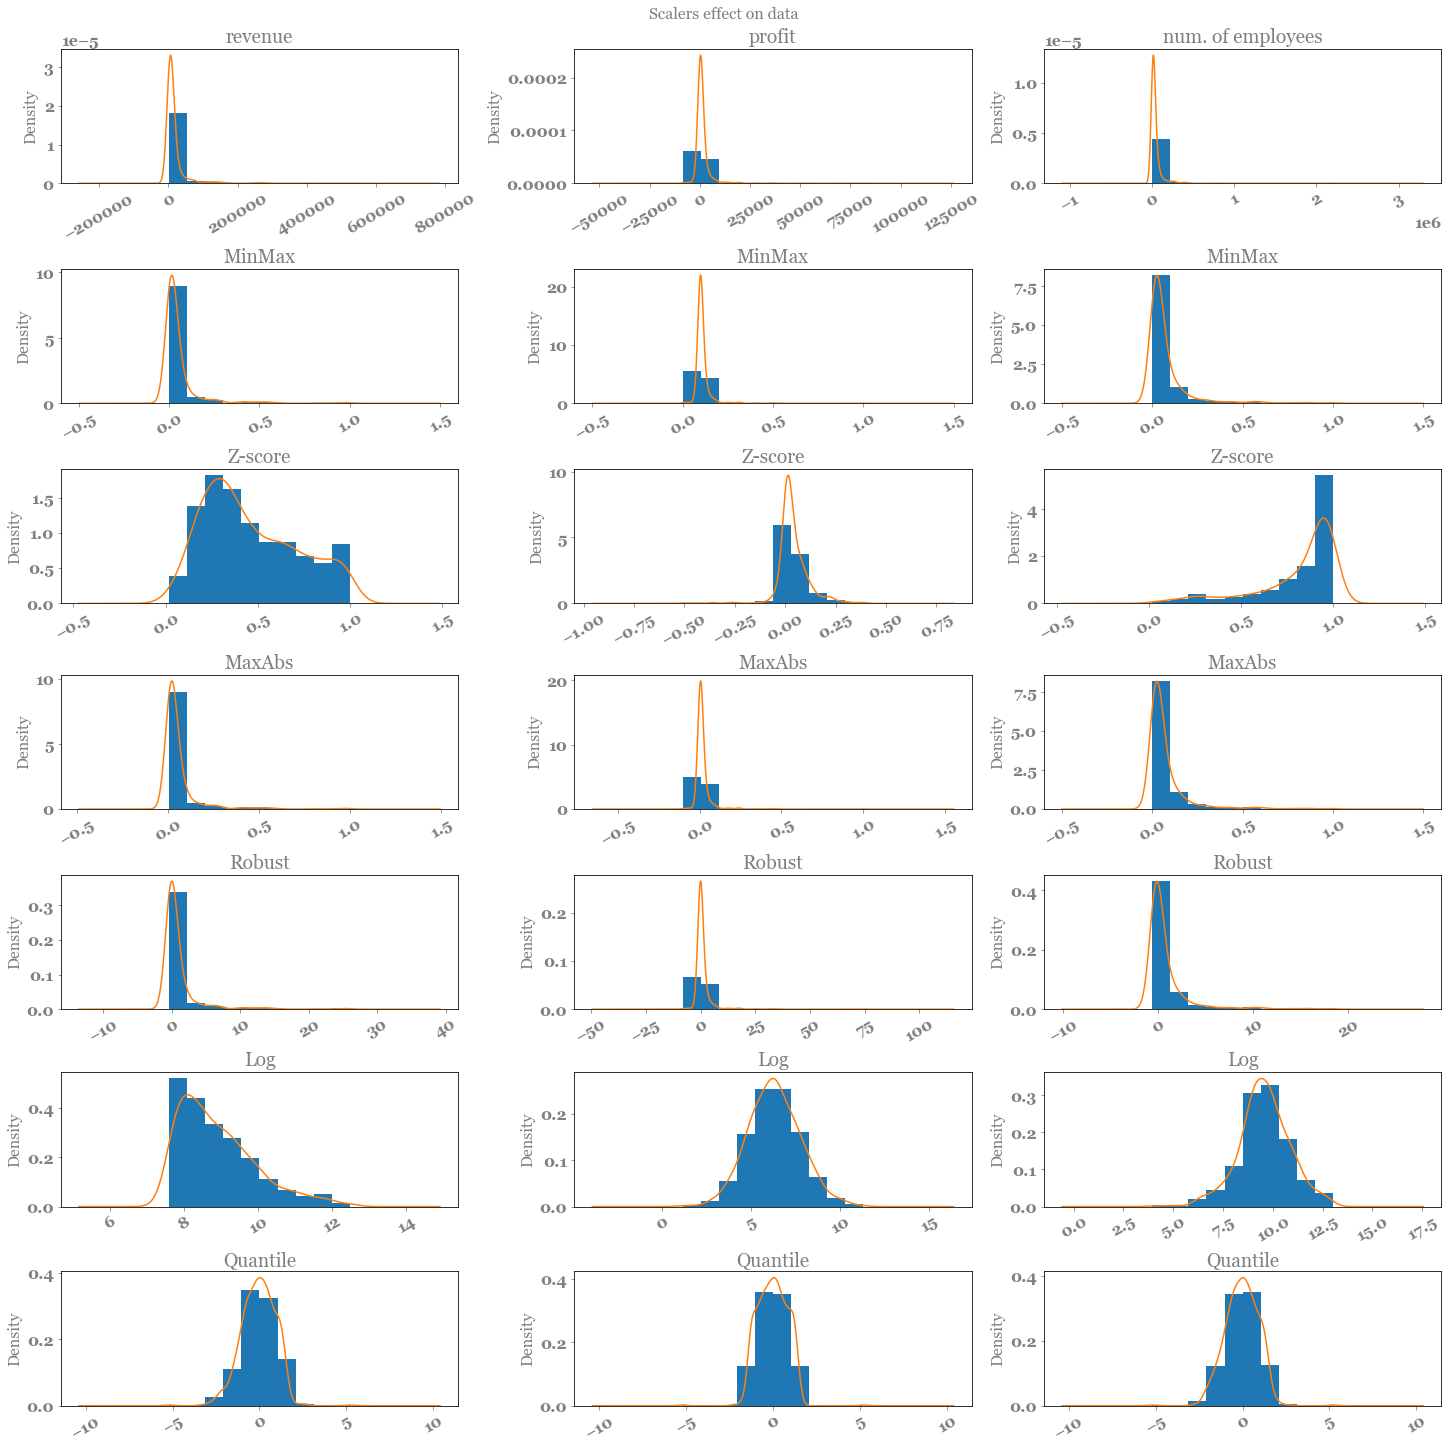

In [70]:
# creating a list of scaled versions of the dataframe, for the purpose of comparing attribute plots

temp_scaling = df.copy()
temp_scaling = temp_scaling.dropna()

for j in range(len(scaler_names)):
    df_scaled = temp_scaling.copy()
    df_scaled[cols_to_be_scaled] = scalers[j].fit_transform(df_scaled[cols_to_be_scaled])
    scaled_dfs.append(df_scaled)

plot_histograms_density_for_scalers(df, cols_to_be_scaled, 'Scalers effect on data', scaled_dfs, scaler_names)

### Scaling Findings
- Z-score and Quantile transformations are the best performing scaling methods. 

# Part 3 – Handling missing data and outliers (38 marks)

- Determine Best **Scaling + Regressor**

- Determine baseline strategy to fill in missing values and replace outliers

- Fill missing data and replace outliers using the decided **Scaling + Regressor Method**


- Models that will be tested:
    - Linear Regression
    - Decision Tree                             
    - KNN Regressor 
    

- Experiment
    - The data will be split in k=10 folds for cross validation. 
    - The best scaling methods chosen above will be applied to different predictive models that will attempt to predict "Market Cap" 
    - This test/experiment will determine the best model + scaling technique 
    - MSE is a great indicator of the quality of an estimator so it will be used to judge the performance of the models
    

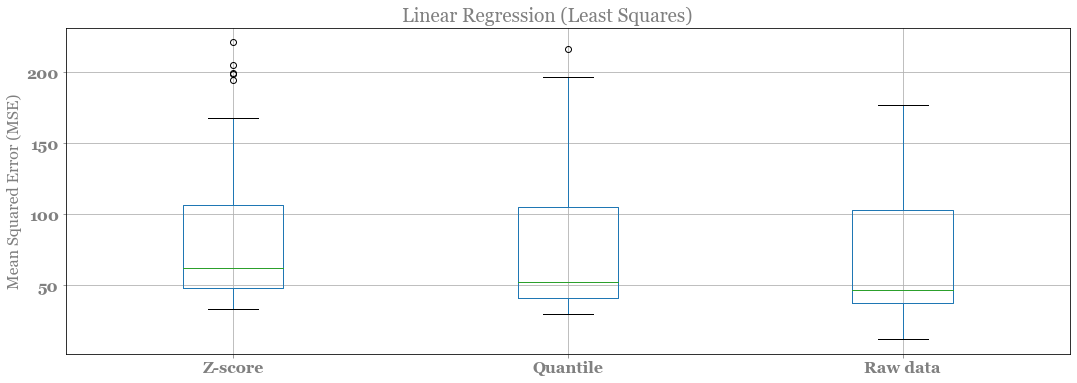

Z-score    86.78
Quantile   80.08
Raw data   71.96
dtype: float64


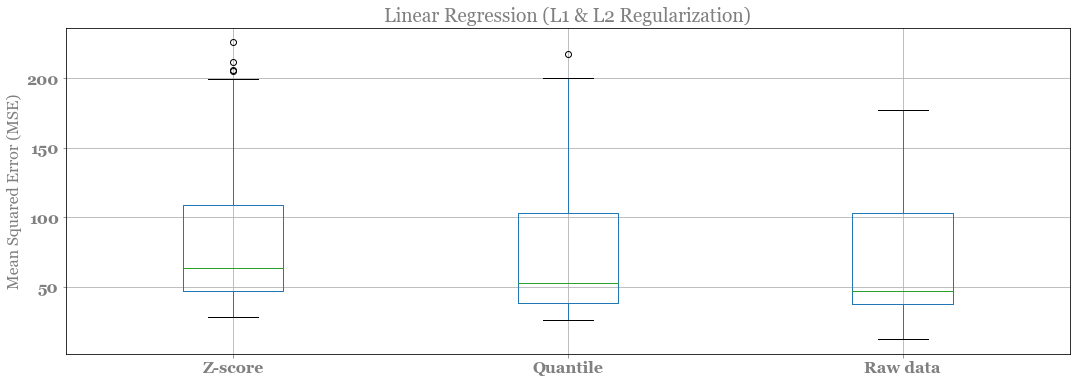

Z-score    88.34
Quantile   79.41
Raw data   71.96
dtype: float64


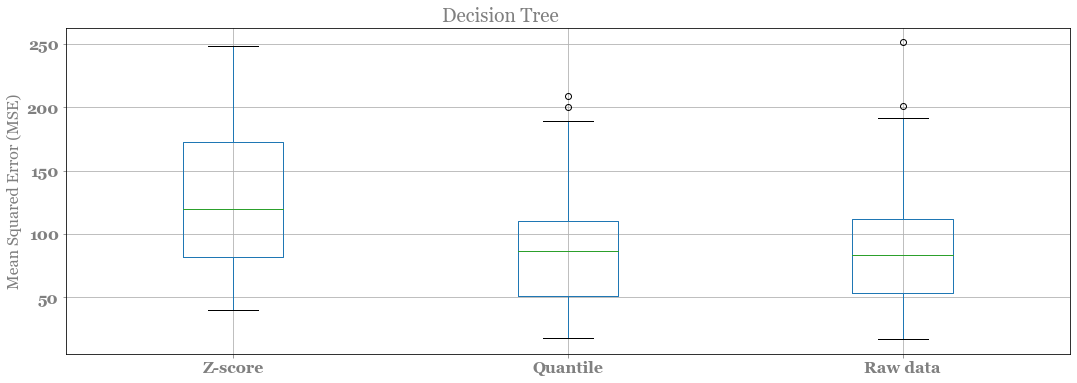

Z-score    128.69
Quantile    87.50
Raw data    90.18
dtype: float64


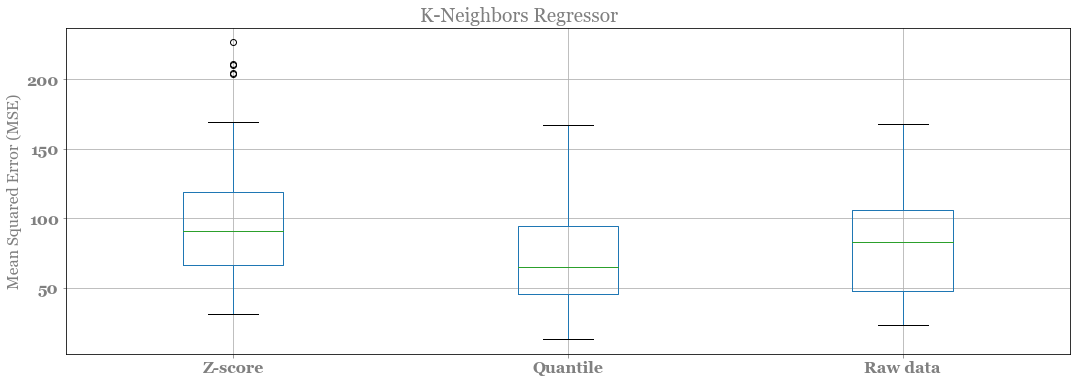

Z-score    101.59
Quantile    72.75
Raw data    79.99
dtype: float64


In [71]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score

# Here, we will only be considering a few attributes for model testing since the remaining attributes are not relevant
# for this purpose, and will lead to much error prone models. Also, this is done so as to reduce the execution period
# while training the model.
temp = df[['revenue', 'profit','num. of employees', 'Market Cap']].copy()
temp = temp.dropna()       # using clean dataframe for creating models

model_names = [
    "Linear Regression (Least Squares)         ",
    "Linear Regression (L1 & L2 Regularization)",
    "Decision Tree                             ",
    "K-Neighbors Regressor                     "
]
models = [
    LinearRegression(),
    ElasticNet(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=3)
]

new_scalers, new_scaler_names = [Normalizer(),
               QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')],['Z-score', 'Quantile']
results = {}
index = 0

for model in models:
    for i in range(len(new_scalers)):
        
        X = temp.drop([target_attribute[0]], axis=1).to_numpy() # X is all the other variables
        X_t = new_scalers[i].fit_transform(X)
        y = temp[target_attribute[0]].to_numpy() # y is target that we want to forecast
        cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42) # Let's estimate the values for several rounds of crossvalidation
        scores = cross_val_score(model, X_t, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
        results[new_scaler_names[i]] = [abs(elem) for elem in scores]

    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    results['Raw data'] = [abs(elem) for elem in scores]

    df_res = pd.DataFrame(results)
    boxplot = df_res.boxplot(figsize=(18,6)) 
    boxplot.set_title(model_names[index])
    boxplot.set_ylabel('Mean Squared Error (MSE)')
    plt.show()
    print(df_res.mean())
    index+=1

### Determine Best **Scaling + Regressor**
- **Quantile + KNN Regressor** is the best performing scaling method + model pair
- It achieves the lowest mean cross validation MSE.
- This value is approximately 83 $\pm$ 0.01 (billion)

### Determine baseline strategy to fill in missing values and replace outliers

For the base case, missing values can be replaced with a centrality measure, like the mean between its neighbouring values. 

Initially checking the number of missing values for each attribute,

In [72]:
df.isna().sum()

company                0
Ticker                 0
CEO                    0
ceo_founder            0
ceo_woman              0
city                   0
state                  0
revenue              113
profit               114
profitable             0
num. of employees      0
sector                 0
Market Cap             1
dtype: int64


So we can see that revenue has 112 values missing, profit has 116 and Market Cap attribute has 1 missing value.


In [73]:
# replacing missing values with the mean of the corresponding attribute column
df_base = df.fillna(df.mean())
df_base.isna().sum()

company              0
Ticker               0
CEO                  0
ceo_founder          0
ceo_woman            0
city                 0
state                0
revenue              0
profit               0
profitable           0
num. of employees    0
sector               0
Market Cap           0
dtype: int64


In the case of outliers, the method chosen to remove them will depend on the density or distribution of each numerical column. 

To get a sense of the distribution we can plot the distribution of numerical data,


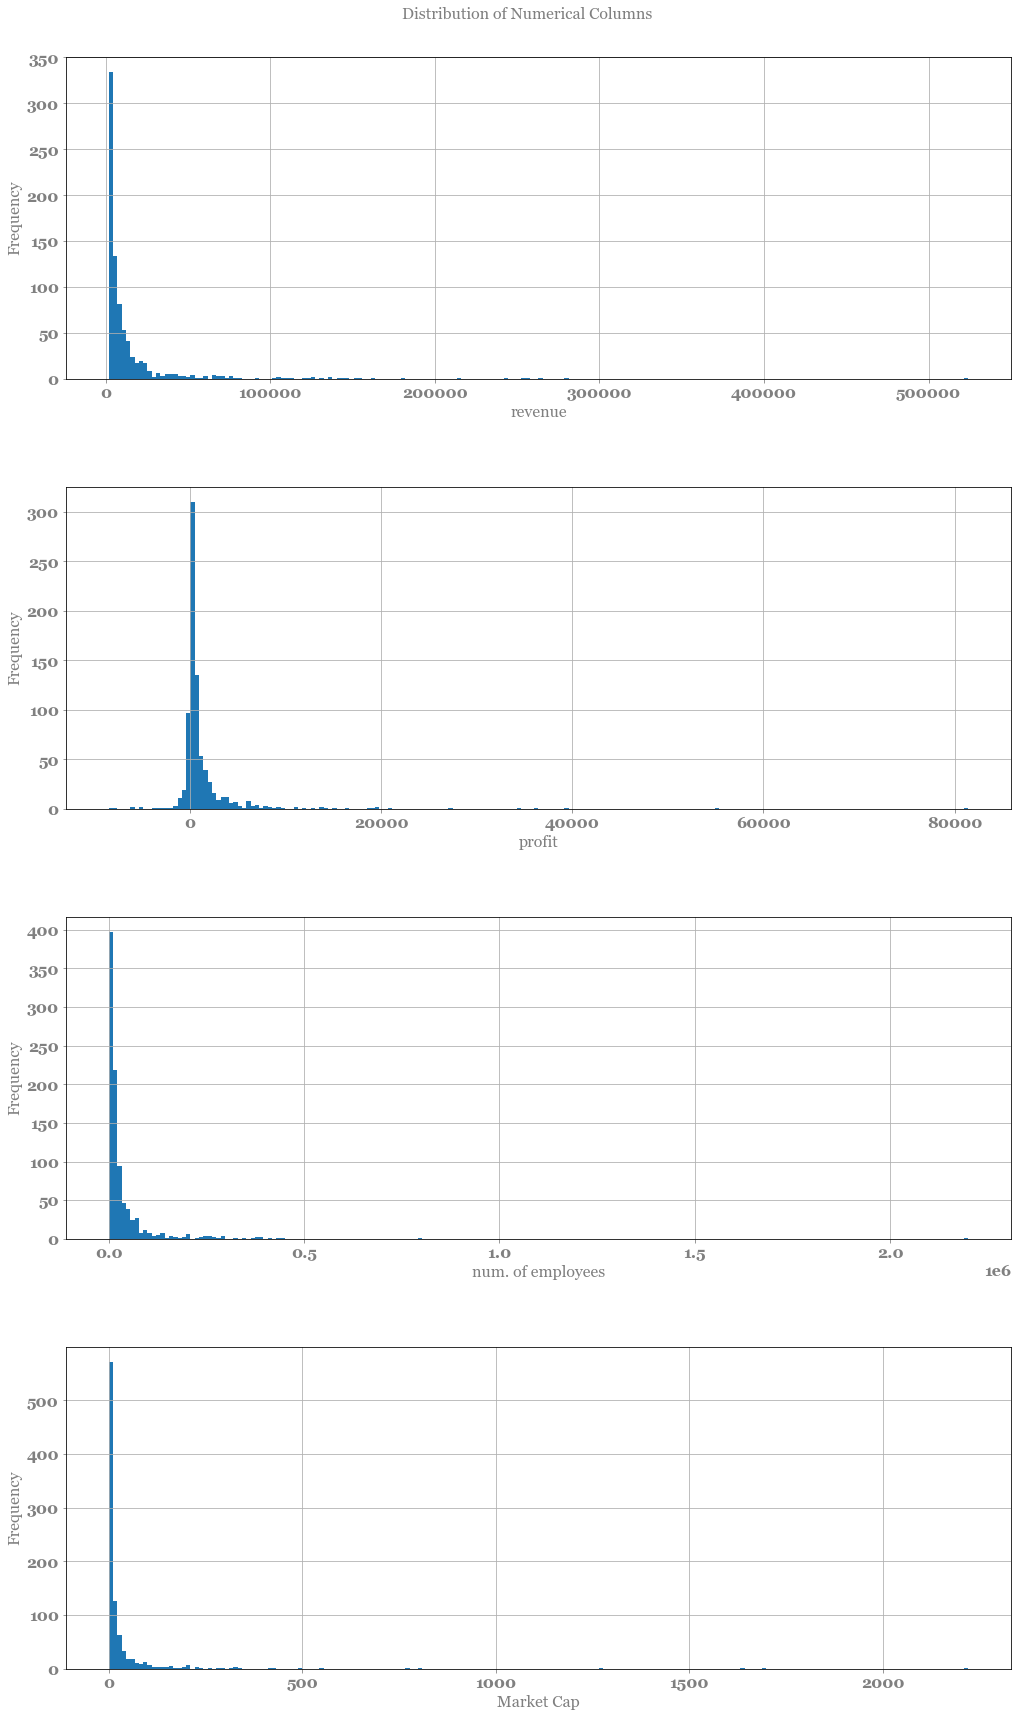

In [74]:
def plot_histograms_density(df, columns, title):
    temp = df.copy()
    fig, axs = plt.subplots(len(columns), 1, figsize = (16,25))
    fig.tight_layout(pad=5.0)
    fig.suptitle(title, fontsize=16)
    
    i = 0
    for col in columns:
        temp[col].hist(ax=axs[i], bins=200)
        axs[i].set_ylabel("Frequency")
        axs[i].set_xlabel(col)
        i += 1

plot_histograms_density(df, numerical_attributes, "Distribution of Numerical Columns")

Plotting the distribution shows that most numerical data is positively skewed so IQR will be used to handle outliers.

#### IQR Strategy for Detecting Outliers 
- The *lower limit* for each numerical column is $Q1 - 1.5 * IQR$ 
- The *upper limit* for each numerical column is $Q3 + 1.5 * IQR$ 
- Values less than the *lower limit* will be set to *lower limit*
- Values less than the *upper limit* will be set to *upper limit*
- Essentially each column is capped to [*lower limit*, *upper limit*]

In [75]:
def show_outliers_iqr(df, columns, verbose):
    temp = df.copy()
    total_outliers = 0
    total_data = 0
    for col in columns:
        Q1 = temp[col].quantile(0.25)
        Q3 = temp[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
    
        column_outliers = len(temp[temp[col] > upper_limit]) + len(temp[temp[col] < lower_limit]) # Outliers in this column
        total_outliers += column_outliers # Add the total outliers in this column to the running total of outliers
        total_data += temp[col].shape[0]    # Total rows in this column
        if (verbose):
            print(f"Column: {col}")
            print(f"The minimum and maximum extremes are: [{round(lower_limit, 2)}, {round(upper_limit, 2)}]")
            print(f"Outliers: {column_outliers}")
            print(f"Outliers in this column: {round(column_outliers/temp[col].shape[0]*100, 2)} % \n")
    print(f"Total outliers for dataframe: {round(total_outliers / total_data * 100, 2)} %")

show_outliers_iqr(df, numerical_attributes, True) # Verbose can be set to false to stop seeing outlier data for each column

 

Column: revenue
The minimum and maximum extremes are: [-11406.75, 27543.25]
Outliers: 89
Outliers in this column: 9.57 % 

Column: profit
The minimum and maximum extremes are: [-1484.04, 2771.86]
Outliers: 107
Outliers in this column: 11.51 % 

Column: num. of employees
The minimum and maximum extremes are: [-27458.75, 64475.25]
Outliers: 115
Outliers in this column: 12.37 % 

Column: Market Cap
The minimum and maximum extremes are: [-28.98, 52.87]
Outliers: 122
Outliers in this column: 13.12 % 

Total outliers for dataframe: 11.64 %



Removing/replacing outliers as the baseline strategy,


In [76]:
# function that removes outliers using the IQR method as the basis

def fixOutliersIQR(cols):
    temp = df_base.copy()
    for col in cols:
        q1 = temp[col].quantile(0.25)
        q3 = temp[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        temp[col] = temp[col].clip(lower=lower_limit, upper=upper_limit)
    return temp

df_base = fixOutliersIQR(numerical_attributes)
df_base

,company,Ticker,CEO,ceo_founder,ceo_woman,city,state,revenue,profit,profitable,num. of employees,sector,Market Cap
rank,,,,,,,,,,,,,
1,Walmart,WMT,C. Douglas McMillon,0,0,Bentonville,1,35028.53,1421.53,1,64475.25,16,53.20
2,Amazon,AMZN,Jeffrey P. Bezos,1,0,Seattle,44,35028.53,1421.53,1,64475.25,16,53.20
3,Exxon Mobil,XOM,Darren W. Woods,0,0,Irving,40,35028.53,3344.50,1,64475.25,4,53.20
4,Apple,AAPL,Timothy D. Cook,0,0,Cupertino,3,16062.95,3344.50,1,64475.25,17,53.20
5,CVS Health,CVS,Karen S. Lynch,0,1,Woonsocket,37,35028.53,3344.50,1,64475.25,9,53.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Mr. Cooper Group,COOP,Jay Bray,0,0,Coppell,40,2007.00,274.00,1,9100.00,6,0.67
997,Herc Holdings,HRI,Lawrence H. Silber,0,0,Bonita Springs,8,1999.00,1421.53,1,5100.00,2,0.59
998,Healthpeak Properties,PEAK,Thomas M. Herzog,0,0,Irvine,3,16062.95,45.50,1,204.00,6,12.06


### Fill missing data and replace outliers using the decided **Scaling + Regressor Method**

Now, for replacing the rows with missing values, we will first store them for predicting corresponding values later,

In [77]:
rows_to_fix = df[df.isna().any(axis=1)]

In [78]:
# create clean dataframe for creating model
clean_df = df[['revenue', 'profit','num. of employees', 'Market Cap']].copy()
clean_df = clean_df.dropna()
rows_to_fix_knn = rows_to_fix[['revenue', 'profit','num. of employees', 'Market Cap']].copy()


The best model + scaling technique was found to be KNN Regressor + quantile transform from earlier. 

Now predicting the missing values in each of Market Cap, revenue and profit in order,


In [79]:
# predicting for attribute Market Cap
X = clean_df.drop(['revenue', 'profit', 'Market Cap'], axis=1).to_numpy()
qntl = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
X_t = qntl.fit_transform(X)
y = clean_df['Market Cap'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_t, y)

X_to_pred = rows_to_fix_knn.drop(['revenue', 'profit', 'Market Cap'], axis=1).to_numpy()
X_t_to_pred = qntl.transform(X_to_pred)

y_pred = model.predict(X_t_to_pred)  # predicting values for missing Market Cap fields
rows_to_fix_knn['Market Cap'] = y_pred # adding the values predicted to the NaN rows

In [80]:
# now predicting for attribute revenue
X = clean_df.drop(['revenue', 'profit'], axis=1).to_numpy()
X_t = qntl.fit_transform(X)
y = clean_df['revenue'].to_numpy()
model.fit(X_t, y)

X_to_pred = rows_to_fix_knn.drop(['revenue', 'profit'], axis=1).to_numpy()
X_t_to_pred = qntl.transform(X_to_pred)

y_pred = model.predict(X_t_to_pred)  # predicting values for missing revenue fields
rows_to_fix_knn['revenue'] = y_pred  # adding the values predicted to the NaN rows

In [81]:
# now predicting for attribute profit
X = clean_df.drop(['profit'], axis=1).to_numpy()
X_t = qntl.fit_transform(X)
y = clean_df['profit'].to_numpy()
model.fit(X_t, y)

X_to_pred = rows_to_fix_knn.drop(['profit'], axis=1).to_numpy()
X_t_to_pred = qntl.transform(X_to_pred)

y_pred = model.predict(X_t_to_pred)  # predicting values for missing profit fields
rows_to_fix_knn['profit'] = y_pred # adding the values predicted to the NaN rows

In [82]:
df_knn = clean_df.append(rows_to_fix_knn)     # putting rows back


Finally, we can reassign the missing values in our original dataframe using the predictions by our model stored in df_knn,


In [83]:
for index, row in df.iterrows():
    if row.isna().any():
        df.loc[index:index, numerical_attributes] = [x for x in df_knn.loc[index].values.tolist()]

df.loc[0:20]

,company,Ticker,CEO,ceo_founder,ceo_woman,city,state,revenue,profit,profitable,num. of employees,sector,Market Cap
rank,,,,,,,,,,,,,
1,Walmart,WMT,C. Douglas McMillon,0,0,Bentonville,1,128559.33,970.67,1,2200000,16,197.36
2,Amazon,AMZN,Jeffrey P. Bezos,1,0,Seattle,44,128559.33,970.67,1,798000,16,197.36
3,Exxon Mobil,XOM,Darren W. Woods,0,0,Irving,40,264938.00,14340.00,1,74900,4,177.92
4,Apple,AAPL,Timothy D. Cook,0,0,Cupertino,3,69361.00,8880.67,1,137000,17,136.24
5,CVS Health,CVS,Karen S. Lynch,0,1,Woonsocket,37,256776.00,6634.00,1,290000,9,98.50
6,Berkshire Hathaway,BRKA,Warren E. Buffett,0,0,Omaha,27,254616.00,81417.00,1,391500,6,550.88
7,UnitedHealth Group,UNH,Andrew P. Witty,0,0,Minnetonka,22,242155.00,13839.00,1,325000,9,332.88
8,McKesson,MCK,Brian S. Tyler,0,0,Irving,40,214319.00,34.00,1,70000,9,29.57
9,AT&T,T,John T. Stankey,0,0,Dallas,40,81074.67,10381.33,1,247800,18,158.64


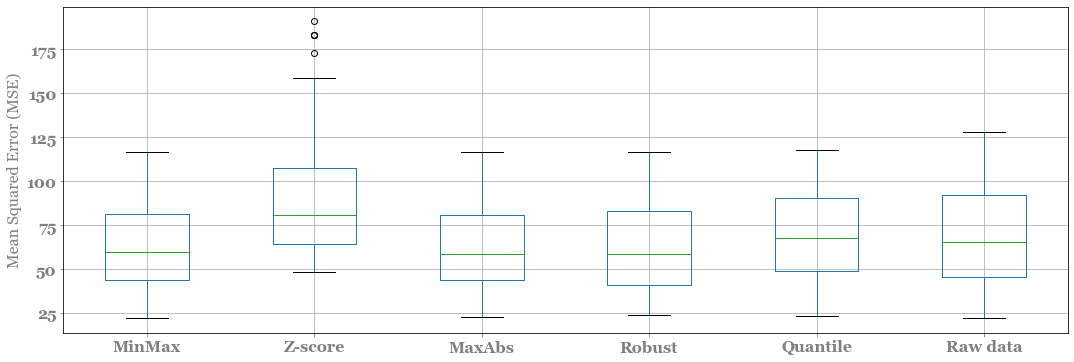

MinMax     64.14
Z-score    93.44
MaxAbs     64.54
Robust     63.78
Quantile   68.94
Raw data   70.24
dtype: float64


In [84]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score

temp = df[['revenue', 'profit','num. of employees', 'Market Cap']].copy() # Were going to ignore the rest of the dataset
temp = temp.dropna()  

scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']
scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]


model = KNeighborsRegressor(n_neighbors=3)
results = {}
index = 0

for i in range(len(scalers)):
    X = temp.drop([target_attribute[0]], axis=1).to_numpy() # X is all the other variables
    X_t = scalers[i].fit_transform(X)
    y = temp[target_attribute[0]].to_numpy() # y is target that we want to forecast
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42) # Let's estimate the values for several rounds of crossvalidation
    scores = cross_val_score(model, X_t, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = [abs(elem) for elem in scores]

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
results['Raw data'] = [abs(elem) for elem in scores]

df_res = pd.DataFrame(results)
boxplot = df_res.boxplot(figsize=(18,6)) 

boxplot.set_ylabel('Mean Squared Error (MSE)')
plt.show()
print(df_res.mean())
